# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [59]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [60]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [61]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Information Extraction

- Used inspect element on the page to find the right key:

In [62]:
table = soup.find('table', attrs={'class':'history-rates-data'})
print(table.prettify()[1:2000])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2023-05-12">
     May 12, 2023
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2023-05-12">
     2023-5-12
    </a>
   </td>
   <td>
    <span class="w">
     <span class="nowrap">
      <span class="currencySymbol">
       $
      </span>
      1 =
     </span>
     <span class="nowrap">
      <span class="currencySymbol">
       Rp
      </span>
      14,844
     </span>
    </span>
    <span class="n">
     <span class="nowrap">
      <span class="currencySymbol">
       $
      </span>
      1 =
     </span>
     <span class="nowrap">
      <span class="currencySymbol">
       Rp
      </span>
      14,844
     </span>
    </span>
   </td>
  </tr>
  <tr class="odd

Finding row length:

In [63]:
table.find_all('a', attrs={'class':'n'})[0].text

'2023-5-12'

In [64]:
row = table.find_all('a', attrs={'class':'n'})

row_length = len(row)
row_length

130

# Scrapping Process

- Two columns to scrap from the page: date and exhange rate.
- Keys for both columns were found in the previous section.
- Values for the rates column are sliced for the sake of a cleaner presentation (unecessary strings were omitted).

In [65]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #get date
    date = table.find_all('a', attrs={'class':'n'})[i].text
    
    #get rate
    rate = table.find_all('span', attrs={'class':'n'})[i].text[7:]
    
    temp.append((date,rate))
    
temp[0:5]

[('2023-5-12', '14,844'),
 ('2023-5-11', '14,776'),
 ('2023-5-10', '14,698'),
 ('2023-5-9', '14,776'),
 ('2023-5-8', '14,744')]

## Creating Dataframe & Wrangling

Converting array into a dataframe:

In [66]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Date','Rate (Rp)'))
df.head()

,Date,Rate (Rp)
0,2023-5-12,"14,844"
1,2023-5-11,"14,776"
2,2023-5-10,"14,698"
3,2023-5-9,"14,776"
4,2023-5-8,"14,744"


Changing the "Date" column values to datetime:

In [67]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Rate (Rp)            object
dtype: object

Dropping the "," in the "Rate" column values to allow for conversion to interger:

In [68]:
df['Rate (Rp)'] = df['Rate (Rp)'].str.replace(',','')
df.head()

,Date,Rate (Rp)
0,2023-05-12,14844
1,2023-05-11,14776
2,2023-05-10,14698
3,2023-05-09,14776
4,2023-05-08,14744


Converting the "Rate" column values into interger:

In [69]:
df['Rate (Rp)'] = df['Rate (Rp)'].astype('int')
df.dtypes

Date         datetime64[ns]
Rate (Rp)             int64
dtype: object

Setting the "Dates" column as the index column to allow for plotting:

In [70]:
df = df.set_index('Date')
df.head()

,Rate (Rp)
Date,
2023-05-12,14844
2023-05-11,14776
2023-05-10,14698
2023-05-09,14776
2023-05-08,14744


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

# Visualisation & Conclusion

## Visualisation

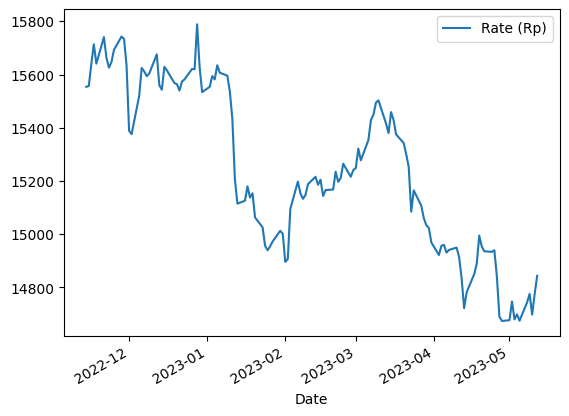

In [71]:
df.plot();

## Analysis & Conclusion:
- The overall trend from 2022-12 to 2023-05 of the USD to IDR exchange rate is downward.
- This means that USD has gone down in value compared to IDR since 2022-12.
